In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
news = pd.read_csv('train.csv')

In [3]:
news.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
news.shape

(20800, 5)

In [5]:
news.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


Here label becomes the target variable(dependent) 0-real 1-fake

In [6]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


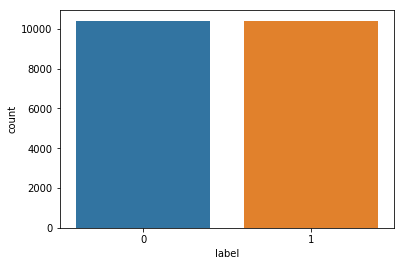

In [7]:
sns.countplot(x='label',data=news)

## Dealing with missing values

In [8]:
news.isnull().values.any()

True

In [96]:
news.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64


title=2.7%
author=9.4%
text=0.18%

In [9]:
news.dropna(axis=0,subset=['text'],inplace=True)

In [10]:
news.isnull().sum()

id           0
title      558
author    1918
text         0
label        0
dtype: int64

In [11]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20761 entries, 0 to 20799
Data columns (total 5 columns):
id        20761 non-null int64
title     20203 non-null object
author    18843 non-null object
text      20761 non-null object
label     20761 non-null int64
dtypes: int64(2), object(3)
memory usage: 973.2+ KB


In [12]:
news.shape

(20761, 5)

Dataset contains 20761 rows which is to split into train and test sets

In [13]:
news

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


### Defining X and Y
X is  independent variabe, Y is dependent variable,
Here Label is Y 

In [15]:
X=news.iloc[:,3].values
X.shape

(20761,)

In [16]:
X

array(['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewi

In [17]:
Y=news.iloc[:,4].values
Y.shape

(20761,)

In [18]:
Y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

## Splitting the dataset

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=7)

In [21]:
X_train.shape

(15570,)

In [22]:
X_test.shape

(5191,)

## TF-IDF Feature extraction 

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
tfidf=TfidfVectorizer(stop_words='english',max_df=0.5)
tfidf_train=tfidf.fit_transform(X_train)
tfidf_test=tfidf.transform(X_test)

max_df=0.5 indicates ignoring the words that appear in more than 50% of documents

## Model build

In [39]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [40]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,Y_train)

#DataFlair - Predict on the test set and calculate accuracy
Y_pred=pac.predict(tfidf_test)
score=accuracy_score(Y_test,Y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 95.67%


In [41]:
cf=confusion_matrix(Y_test,Y_pred,labels=[0,1])
print(cf)

[[2432   95]
 [ 130 2534]]


In [42]:
values = pd.DataFrame(Y_test, columns=['Original'])
values

,Original
0,0
1,1
2,0
3,1
4,0
5,0
6,1
7,0
8,1
9,0


In [43]:
values['Predictions']=pd.Series(Y_pred)
values

,Original,Predictions
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,1
6,1,1
7,0,0
8,1,1
9,0,0


In [44]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfidf.transform(input_data)
    prediction = pac.predict(vectorized_input_data)
    print (prediction)

In [45]:
fake_news_det('Russian warships ready to strike terrorists near Aleppo 08.11.2016')

[1]


In [46]:
fake_news_det("Trump is USA's antique hero. Clinton will be next president 08.11.2016")

[1]


In [47]:
fake_news_det("BERLIN  â€”   You could never palm it, flip it or plunk it into a vending machine. But apparently it can be pinched: One of the worldâ€™s largest gold coins, a   Canadian monster called the Big Maple Leaf, was stolen overnight from the Bode Museum in Berlin, the police said on Monday. The coin is about 21 inches in diameter and over an inch thick. It has the head of Queen Elizabeth II on one side and a maple leaf on the other. Its face value is 1 million Canadian dollars, or about $750, 000, but by gold content alone, it is worth as much as $4. 5 million at current market prices. And though it weighs about as much as a refrigerator, somehow thieves apparently managed to lug it through the museum and up at least one floor to get it out of a window at the back of the building. The police are still trying to figure out exactly how they did it. The Bode Museum, which sits on Museum Island in the Spree River, is part of the complex belonging to the Prussian Cultural Heritage Foundation, or in German, the Preussischer Kulturbesitz. The local   commuter railway runs across the island along the back of the museum. The burglars seemed to have broken in through a window above the railway tracks during the     hours when the trains pause for the night. The police were alerted to the   at 4 a. m. and think that it took place between 3:20 a. m. and 3:45 a. m. The window, some three to four yards above the tracks, stood ajar and appeared to have been â€œforcibly opened,â€ said Winfrid Wenzel, a police spokesman. Officers searching the crime scene found a ladder on the elevated railwayâ€™s roadbed, which is near the museumâ€™s back wall. The police declined to give further details, including whether security cameras monitored that window, or whether the museumâ€™s alarm systems had gone off. The Big Maple Leaf had been on display since December 2010, on a floor below the window in its own bulletproof case. It was surrounded by other, smaller gold coins. The bulletproof glass â€œappeared to have been violently shattered,â€ Mr. Wenzel said. But the thieves seemed to know what they wanted the smaller gold coins were untouched. Given the coinâ€™s weight, the authorities said they suspected that more than one person was involved. Their theory for now is that the thieves dragged the coin through the museum, out the window and then along the railway track, possibly reaching a park on the opposite bank of the river near the Hackescher Markt, a public square in Berlin that is home to a number of   bars and cafes. The police appealed for clues from anyone who had been in the area at that time. Experts said it would be difficult to sell the stolen coin, but worried that it could be melted down and the gold resold on the open market. The museum is regularly closed on Mondays and is expected to reopen as planned on Tuesday. In addition to paintings, sculptures and other works of art, the museum displays what it says is one of the largest collection of coins and medals in the world, with about 500, 000 objects. The Royal Canadian Mint created its first   coin, in Canadian dollars, as a demonstration in 2007  â€”   â€œbecause we can,â€ the mint says on its website  â€”   to draw attention to its series of more modestly sized, if still costly, pure gold coins. But Alex Reeves, a spokesman for the mint, said it decided to produce up to 10 copies of the Big Maple Leaf after being approached by potential buyers. Interest, however, has been limited. Only five have been produced for sale to date the last delivery was made in 2008. â€œWe were satisfied with selling five coins we didnâ€™t expect to sell at all,â€ Mr. Reeves said. A granite display stand is supplied with the coin when purchased. Mr. Reeves said that the mint, which still has the first coin â€œsafe and sound in our high security vault,â€ moves it around in a trunk with casters similar to those used by traveling music acts and stage shows. Not included, however, is any sort of theft protection plan. â€œCustomers are responsible for security of their own assets,â€ Mr. Reeves said.")

[0]


In [48]:
fake_news_det("FOXBOROUGH, Mass.  â€”   The N. F. L. likes portraying itself as one big family of owners, players and fans who, despite their differences, come together on game days. Yet at the Super Bowl in Houston in two weeks, the N. F. L. may have no choice but to air a public and profound grudge on national television. If the New England Patriots defeat the Pittsburgh Steelers on Sunday as they are favored to do and go on to beat either the Atlanta Falcons or the Green Bay Packers for the title, the league commissioner, Roger Goodell, will have to present the Lombardi Trophy to Robert K. Kraft, the owner of the Patriots. The moment would be delicious payback for Kraft, who is still simmering about the   suspension his quarterback, Tom Brady, served as a result of the cheating scandal known as Deflategate, after the underinflated footballs meant to give him a throwing advantage. In spite  â€”   or, perhaps, because  â€”   of it all, New England went   this season and throttled the Houston Texans last week in its playoff opener. Kraft largely kept quiet while the Brady case played out. But in a recent interview, he made clear that he remains annoyed by how his best player and team were pilloried. â€œSometimes, the league really messes up, and I think they really messed this up badly,â€ he said in a   discussion in his Gillette Stadium office here. â€œBut weâ€™ve all agreed to subjugate our right to disrupt everythingâ€  â€”   the Patriots declined to fight the league over financial penalties it levied on the team  â€”   â€œI mean, we can, but weâ€™re a partnership. Thereâ€™s jealousy, thereâ€™s envy, thereâ€™s stupidity. Sometimes, life is unfair, and you have to suck it up and move on and not use it as an excuse. â€ Let bygones be bygones? Not quite. Goodell has not been seen at a Patriots home game in two years, and on Sunday, rather than face the wrath of Patriots fans, he will, for the second consecutive week, travel to Atlanta for the N. F. C. Championship game instead. This relationship may have evolved into one of the biggest tests of the diplomatic skills  â€”   in football and in his larger world of finance and philanthropy  â€”   that Kraft prides himself on. Never mind that he owns one of the most polarizing teams, one that, while certainly beloved in New England, has failed to attract the kind of passionate national following of the Cowboys or the Packers. Some of the distaste, of course, reflects a jealousy created by their four Super Bowl titles  â€”   and six appearances in the title game  â€”   over the last 15 years. But there is also the coach, Bill Belichick, who although most likely headed to the Hall of Fame, is hard to love with his taciturn and grumpy manner in public. Also not helping are a series of scandals, including New Englandâ€™s spying on the New York Jets in 2007, and another involving a former player, Aaron Hernandez, who was convicted of committing a murder that occurred while he was a member of the team. And Brady and those footballs. So the internet likes to discuss things like â€œ15 Reasons Why People Hate the New England Patriots. â€ Kraft, a native of Brookline, Mass. who bought the Patriots 23 years ago for a   $172 million, chalks up such animosity to the teamâ€™s success. He has an apartment in Manhattan, and in the years after he bought the team, he would get razzed by people on the street. â€œThey used to be aggressive and nasty, and now theyâ€™re more respectful because I think weâ€™ve been able to do pretty well and sustained it,â€ Kraft said. Still, the friction cuts against the image of affability and reason that Kraft, 75, likes to project. When a New York Times reporter stepped into his office, the first thing Kraft did was hand him two small cartons of eggs from his family farm, assuring him they would be the best he had ever eaten. On his desk facing visitors was a small plaque with the greeting â€œShalom Yâ€™all!â€ The 30 minutes allotted for the interview went on way longer, though some of it was given to asides and   tangents. Kraft, whose billions come primarily from a packaging and paper empire and an assortment of other investments, sidestepped questions about whether winning a Super Bowl would have any extra meaning this year. Until Deflategate, he and Goodell publicly got along well, and Kraft takes pride in his facility for building relationships with a wide range of sports figures, celebrities, politicians and business leaders. One week, Secretary of State John Kerry might join him in his suite, and the next itâ€™s media titans like Rupert Murdoch and Leslie Moonves. Among N. F. L. owners, whose politics tilt Republican, Kraft is among the most loyal donors to Democratic candidates. Yet he, as well as Brady and Belichick, considers   Donald J. Trump a good friend, a tricky relationship in heavily Democratic Massachusetts, which voted for Hillary Clinton by a wide margin. Kraft said they met 20 years ago when Trump invited him to play golf at his club in West Palm Beach, Fla. â€œLoyalty is important to me, and he has been a wonderful friend,â€ Kraft said. â€œI think one of the great problems in the country today is the working poor, the middle class, that there hasnâ€™t been growth in income on an equal basis, and I really think the policies heâ€™s going to bring to bear are going to be great for the economic side of America. â€ It is hard to tell if his association with Trump is costing the team fans, but then, as a team owner and businessman, he is used to being a target. He has had legal fights with business partners, including those with a stake in the land where Gillette Stadium now stands. Patriots fans, too, lashed out at Kraft for not doing more to fight the N. F. L. during Deflategate. Yet he is influential enough in the league that owners and officials prefer to keep their criticisms of him to private conversations. When Kraft and other team owners clash over league issues, it is usually behind closed doors. â€œWe do have dissent and do have things I think you couldnâ€™t help but have,â€ said the Dallas Cowboys owner, Jerry Jones, who rivals Kraft for influence in the league. â€œI think Bob has exhibited disagreement, but heâ€™s also very capable of making and influencing change. Iâ€™m someone, if he has ideas, I would certainly be a good listener. â€ Kraft is still a very   owner, but three of his sons have taken on greater responsibilities with the Patriots and the familyâ€™s portfolio of company investments, including a Major League Soccer team, the New England Revolution. More and more, Kraft said, he is focusing on strategizing and bringing people together. Like Arabs and Jews. He has sought to broker Middle East conciliation through sports and investments, citing economic interdependence as a unifying agent. Several years ago, Kraft, who is Jewish, operated a packaging company that employed Israelis and Palestinians. He has taken dozens of Christian friends to Israel, including Brady and, in 2015, 19 former N. F. L. players, some of whom were baptized in the Jordan River. Still, though he often portrays himself as a unifier, some people  â€”   or teams  â€”   do irk him. Like the Indianapolis Colts. During halftime in a victory over the Miami Dolphins last season, while praising Willie McGinest, a linebacker inducted into the teamâ€™s hall of fame that night, Kraft made sure to point out that McGinest was on teams that beat the Colts 16 times in 12 seasons. It was seven months after the Colts first suggested that New England used underinflated balls in the A. F. C. Championship game they lost,  . McGinest said he understood how Kraft could still be offended. â€œWhen you take away from somebodyâ€™s hard work or everything that goes into winning those types of games, itâ€™s pretty upsetting,â€ said McGinest, now an analyst for NFL Network. â€œThatâ€™s his baby. Those players are all his. That team, itâ€™s his baby. â€ At the Patriots, Kraft  â€”   and, before her death from cancer in 2011, his wife, Myra  â€”   has had a reputation for forming lasting relationships with his players and engaging in conversations with them beyond football. The Hall of Fame running back Curtis Martin grew close to the Krafts during his three seasons in New England. Martin, who identifies as a Christian, spent some Jewish holidays with the Krafts and so grew to love chicken soup served by Myra Kraft that she would give some to her husband to place in Martinâ€™s locker. â€œI didnâ€™t deem it as normal,â€ Martin, who also traveled to Israel with Kraft, said in a telephone interview. â€œI thought it was something that was very rare. â€ Now a businessman himself, Martin cherishes the day during his rookie season, in 1995, when Kraft invited him to a   plant he owned. â€œEverything has a process to it,â€ Martin said, explaining the lesson he learned. â€œAnd when you neglect the process, you ultimately neglect your ability to be successful at whatever youâ€™re striving for. Thatâ€™s an experience Iâ€™ll never forget. â€ Kraft, former players say, is a regular presence in the locker room, where   personnel rarely tread, greeting players, even those who are not stars, by name. Sometimes, he can show a playful,   side. During receiver Donte Stallworthâ€™s first stint in New England, in 2007, he and Randy Moss were leaving the cafeteria on their way to the receivers meeting room when Kraft stopped them in the hallway and handed them a manila folder. Opening it, Moss and Stallworth burst into laughter: Inside was a photograph of Kraft and the rapper 50 Cent sipping mai tais on a beach. â€œI know you two young men are pretty cool and you guys are young studs,â€ Kraft told them, according to Stallworth. â€œIâ€™m an old guy, but Iâ€™m not too bad myself. â€ Stallworth added: â€œHe doesnâ€™t walk around like he owns the place, even though he does. â€ Indeed, Kraft was very at home in his office, which is stuffed with photos, memorabilia and knickknacks. Cradling a big cup of Dunkin Donuts coffee, Kraft spoke about how he had managed to maintain consistent success at the Patriots, whether they win the Super Bowl this year or not. â€œMy job is to keep everyone together, strong big egos, and keep the peace in the family,â€ he said. Looming large near his desk, propped against a wall, was a painting of Brady.")

[0]


In [49]:
fake_news_det("Trump warned his supporters that the US Postal Service is trying to steal the election for Hillary Clinton in Colorado.")

[1]


In [50]:
fake_news_det("Originally appeared at Chronicles ")

[1]


In [51]:
fake_news_det("Urban Population Booms Will Make Climate Change Worse Posted on Oct 27, 2016 ")

[1]


In [52]:
fake_news_det("World will end in 2022")

[1]


In [54]:
fake_news_det("PALO ALTO, Calif.  â€”   After years of scorning the political process, Silicon Valley has leapt into the fray. The prospect of a President Donald J. Trump is pushing the tech community to move beyond its traditional role as donors and to embrace a new existence as agitators and activists. A distinguished venture capital firm emblazoned on its corporate home page an earthy   epithet. One prominent tech chieftain says the consequences of Mr. Trumpâ€™s election would â€œrange between disastrous and terrible. â€ Another compares him to a dictator. And nearly 150 tech leaders signed an open letter decrying Mr. Trump and his campaign of â€œangerâ€ and â€œbigotry. â€ Not quite all the action is  . Peter Thiel, a founder of PayPal and Palantir who was the first outside investor in Facebook, spoke at the Republican convention in July. The New York Times reported on Saturday that Mr. Thiel is giving $1. 25 million to support Mr. Trumpâ€™s candidacy even as other supporters flee. (He also recently gave $1 million to a â€œsuper PACâ€ that supports Senator Rob Portman, the Republican freshman running for   in Ohio.) Getting involved in politics used to be seen as clashing with Silicon Valleyâ€™s value system: You transform the world by making problems obsolete, not solving them through Washington. Nor did entrepreneurs want to alienate whatever segment of customers did not agree with them politically. Such reticence is no longer in style here. â€œWeâ€™re a bunch of nerds not used to having a lot of limelight,â€ said Dave McClure, an investor who runs a tech incubator called 500 Startups. â€œBut to quote   â€˜With great power comes great responsibility. â€™â€ Mr. McClure grew worried after the Republican and Democratic conventions as Mr. Trump began to catch up to Hillary Clinton in the polls. He wanted Silicon Valley to do more, and so late last month he announced Nerdz4Hillary, an informal   effort. An initial group of donors pledged $50, 000 the goal was to ask the â€œnerdzâ€ for small donations to match that sum. They have not come through yet. â€œWeâ€™re kind of optimistic weâ€™ll get the other $50, 000 in a few weeks,â€ Mr. McClure said. That relatively slow pace reflects Silicon Valleyâ€™s shifting position: Even as it becomes increasingly free with its opinions, it has been less free with its checkbook. The most recent data, from late August, shows Mrs. Clinton taking in $7. 7 million from the tech community, according to Crowdpac, a   that tracks donations. By that point in 2012, Crowdpac says, President Obama had raised $21 million from entrepreneurs and venture capitalists. Reid Hoffman, the billionaire   of the business networking site LinkedIn, offers a snapshot of Silicon Valleyâ€™s evolving approach to politics. Mr. Hoffman was a top Obama donor, giving $1 million to the Priorities USA political action committee, something several of his peers did as well. Last month, Mr. Hoffman garnered worldwide publicity for saying he would donate up to $5 million to veteransâ€™ groups if Mr. Trump released his taxes, a remote possibility that never came to pass. He has castigated Mr. Trump in interviews, saying he was speaking for those who were afraid. Mr. Hoffmanâ€™s outright donations, however, have been smaller this election cycle. In May, he gave $400, 000 to the Hillary Victory Fund. Asked if there was more recent giving that had not shown up in federal election records, Mr. Hoffman cryptically responded in an email, â€œLooking at some PACs, etc. â€ He declined several opportunities to elaborate. Even as Priorities USA has raised $133 million this election cycle, far exceeding its total in 2012, its tech contributions have dwindled. The only familiar tech name this time around is John Doerr of the venture capital firm Kleiner Perkins Caufield  Byers, who gave $500, 000. The AOL   Steve Case said his September endorsement of Mrs. Clinton, via an   in The Washington Post, was the first time he ever publicly declared for a candidate. â€œI always focused on policy and avoided politics,â€ he said. â€œBut if Trump were elected president, I would be disappointed in myself for not acting. â€ When he wrote the   he was uncertain about donating money to Mrs. Clinton, saying only that it was â€œprobable. â€ A spokeswoman said Sunday that Mr. Case gave $25, 000 to the Hillary Victory Fund. Mason Harrison, Crowdpacâ€™s head of communications, offered a possible reason for Mrs. Clintonâ€™s    support. â€œDonors give to support candidates they love, not to defeat candidates they fear,â€ he said. A few billionaires are acting instead of talking. Dustin Moskovitz, a founder of Facebook, said he was giving $20 million to various Democratic election efforts  â€”   the first time he and his wife, Cari Tuna, have endorsed a candidate. He declined to be interviewed. Part of the problem for Mrs. Clinton is that, however preferable she may be to Mr. Trump in the tech community, she pales in comparison to President Obama. After some initial misgivings, Silicon Valley found its champion in him. There has been a revolving door between tech and the Obama administration, just as previous Democratic administrations had a revolving door with Wall Street. In June, President Obama seemed to suggest that he might become a venture capitalist after his term ends. Mrs. Clinton is not as enthusiastic toward Silicon Valley and its disruptive ways. In a speech in the summer of 2015, she noted that   in the â€œ  or   gig economyâ€  â€”   Uber, Airbnb and their ilk  â€”   were â€œunleashing innovationâ€ but also â€œraising hard questions about workplace protection and what a good job will look like in the future. â€ The Clinton campaign declined to comment. The Trump campaign did not respond to a query. Even as Silicon Valley works against Mr. Trump, there is quiet acknowledgment that his campaign has bared some important issues. In an endorsement this month of Mrs. Clinton, the venture capital firm Union Square Ventures pointed out that â€œthe benefits of technology and globalization have not been evenly distributed,â€ and that this needed to change. If Silicon Valleyâ€™s political involvement outlasts this unusual election, the tech community may start contributing more to the process than commentary and cash. â€œNot only are tech people going to be wielding influence, but theyâ€™re going to be the candidate,â€ Mr. McClure said. â€œReid Hoffman, Sheryl Sandbergâ€  â€”   the chief operating officer of Facebook  â€”   â€œand a bunch of other folks here have political aspirations. â€ Others may be inspired to enter politics through other doors. Palmer Luckey is the    founder of the Oculus virtual reality company, which he sold to Facebook for $2 billion. Mr. Luckey donated $10, 000 to a group dedicated to spreading    messages about Mrs. Clinton both online and off. The groupâ€™s first billboard, said to be outside Pittsburgh, labeled her â€œToo Big to Jail. â€ Mr. Luckey told The Daily Beast that his thinking â€œwent along the lines of, â€˜Hey, I have a bunch of money. I would love to see more of this stuff. â€™â€ He added, â€œI thought it sounded like a real jolly good time. â€ Many virtual reality developers were less happy, and Mr. Luckey quickly posted his regrets on Facebook. He declined to comment further. â€œIf weâ€™re going to be more vocal, weâ€™ll have to live more transparently,â€ said Hunter Walk, a venture capitalist whose campaign to persuade tech companies to give workers Election Day off signed up nearly 300 firms, including Spotify, SurveyMonkey and TaskRabbit. â€œThere will be a period of adjustment. â€ But perhaps being vocal is a temporary condition after all. The venture firm CRV was in the spotlight at the end of August with its blunt   message, which included the earthy epithet. A few weeks later, it cleaned up its website. The partners went from employing a publicist to seek out attention to declining interviews. â€œWe reached everyone we wanted to reach, and hopefully influenced opinions,â€ said Saar Gur, a CRV venture capitalist. â€œThen the buzz died down and we went back to our day jobs, which are super busy. â€")

[0]
